# Trash & Treasure: How Wealth Tracks Plastic Mismanagement

## Introduction

Plastic pollution has become one of the defining environmental challenges of our time. While economic growth often brings improved infrastructure and waste management systems, it can also drive higher consumption and greater waste generation. This project explores the relationship between a country's wealth, measured as GDP per capita, and the amount of mismanaged plastic waste generated per person.

This project uses data from **Our World in Data (OWID)**:
- **Mismanaged Plastic Waste per Capita** (kilograms per person)
- **GDP per Capita** (in current international dollars, PPP adjusted)

By comparing these datasets, we investigate whether richer nations tend to manage their plastic waste more effectively, or whether rising prosperity correlates with higher levels of mismanagement. The analysis covers multiple years and regions, and includes visual explorations of trends, distributions, and fair comparisons through visualizations.

**Key Research Question**: Do wealthier countries mismanage less plastic waste per person, or does economic growth shift the problem elsewhere?


## Environment Setup 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Import

In [2]:
plastic_df = pd.read_csv("mismanaged-plastic-waste-per-capita.csv")
gdp_df = pd.read_csv("gdp-per-capita-worldbank.csv")

print("\nGDP per Capita Dataset:")
display(plastic_df.head())

print("\nGDP per Capita Dataset:")
display(gdp_df.head())


GDP per Capita Dataset:


,Entity,Code,Year,Mismanaged plastic waste per capita (kg per year)
0,Africa,NaN,2019,10.465928
1,Albania,ALB,2019,24.239153
2,Algeria,DZA,2019,17.758995
3,Angola,AGO,2019,7.445279
4,Antigua and Barbuda,ATG,2019,6.463918



GDP per Capita Dataset:


,Entity,Code,Year,"GDP per capita, PPP (constant 2021 international $)",World regions according to OWID
0,Afghanistan,AFG,2000,1617.8264,NaN
1,Afghanistan,AFG,2001,1454.1108,NaN
2,Afghanistan,AFG,2002,1774.3087,NaN
3,Afghanistan,AFG,2003,1815.9282,NaN
4,Afghanistan,AFG,2004,1776.9182,NaN


## Dataset Cleaning

In [3]:
plastic_clean = (
    plastic_df
    .rename(columns={
        "Entity": "Country",
        "Mismanaged plastic waste per capita (kg per year)": "Plastic_waste_kg_per_capita"
    })[["Country", "Code", "Year", "Plastic_waste_kg_per_capita"]]
)

plastic_clean = plastic_clean.dropna(subset=["Plastic_waste_kg_per_capita"])

print("Plastic Waste Dataset Cleaned:")
display(plastic_clean.head())
print("Shape:", plastic_clean.shape)

gdp_clean = (
    gdp_df
    .rename(columns={
        "Entity": "Country",
        "GDP per capita, PPP (constant 2021 international $)": "GDP_per_capita_PPP"
    })[["Country", "Code", "Year", "GDP_per_capita_PPP"]]
)

gdp_clean = gdp_clean.dropna(subset=["GDP_per_capita_PPP"])

print("\nGDP Dataset Cleaned:")
display(gdp_clean.head())
print("Shape:", gdp_clean.shape)

Plastic Waste Dataset Cleaned:


,Country,Code,Year,Plastic_waste_kg_per_capita
0,Africa,NaN,2019,10.465928
1,Albania,ALB,2019,24.239153
2,Algeria,DZA,2019,17.758995
3,Angola,AGO,2019,7.445279
4,Antigua and Barbuda,ATG,2019,6.463918


Shape: (165, 4)

GDP Dataset Cleaned:


,Country,Code,Year,GDP_per_capita_PPP
0,Afghanistan,AFG,2000,1617.8264
1,Afghanistan,AFG,2001,1454.1108
2,Afghanistan,AFG,2002,1774.3087
3,Afghanistan,AFG,2003,1815.9282
4,Afghanistan,AFG,2004,1776.9182


Shape: (7236, 4)


## Merging Datasets

In [4]:
common_years = sorted(set(plastic_clean["Year"]).intersection(gdp_clean["Year"]))
print("Common years between datasets:", common_years)

plastic_ready = plastic_clean[plastic_clean["Year"].isin(common_years)]
gdp_ready = gdp_clean[gdp_clean["Year"].isin(common_years)]

merged_df = pd.merge(plastic_ready, gdp_ready, on=["Country", "Code", "Year"], how="inner")

merged_df = merged_df.dropna(subset=["Plastic_waste_kg_per_capita", "GDP_per_capita_PPP"])

print("\nMerged Dataset Preview:")
display(merged_df.head())
print("\nFinal Shape:", merged_df.shape)

Common years between datasets: [2019]

Merged Dataset Preview:


,Country,Code,Year,Plastic_waste_kg_per_capita,GDP_per_capita_PPP
0,Albania,ALB,2019,24.239153,15078.507
1,Algeria,DZA,2019,17.758995,15199.199
2,Angola,AGO,2019,7.445279,8274.543
3,Antigua and Barbuda,ATG,2019,6.463918,29651.863
4,Argentina,ARG,2019,10.401912,26629.553



Final Shape: (149, 5)


## Data Exploration:

### **Figure 1.** Historgram of Plastic Waste

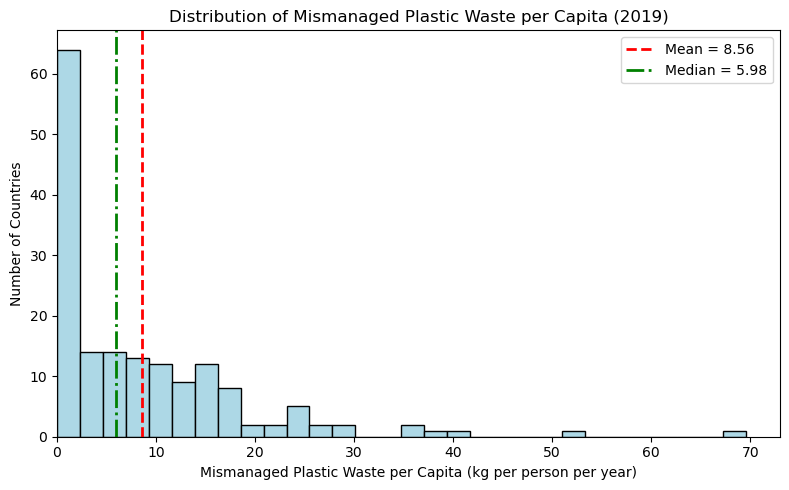

In [5]:
mean_val = plastic_clean["Plastic_waste_kg_per_capita"].mean()
median_val = plastic_clean["Plastic_waste_kg_per_capita"].median()

plt.figure(figsize=(8, 5))
plt.hist(
    plastic_clean["Plastic_waste_kg_per_capita"],
    bins=30,
    range=(0, plastic_clean["Plastic_waste_kg_per_capita"].max()),
    color="lightblue",
    edgecolor="black"
)

plt.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Mean = {mean_val:.2f}")
plt.axvline(median_val, color="green", linestyle="-.", linewidth=2, label=f"Median = {median_val:.2f}")

plt.title("Distribution of Mismanaged Plastic Waste per Capita (2019)")
plt.xlabel("Mismanaged Plastic Waste per Capita (kg per person per year)")
plt.ylabel("Number of Countries")
plt.xlim(left=0)
plt.legend()
plt.tight_layout()
plt.show()

**Figure 1. Distribution of mismanaged plastic waste per capita in 2019.** Most countries produce relatively low levels of mismanaged plastic waste per person (under 10 kg per year), while a few countries generate much higher amounts. The mean (red dashed line) is higher than the median (green dash-dot line), indicating a right skewed distribution driven by the high waste outliers.

### **Figure 2.** KED of GDP per Capita

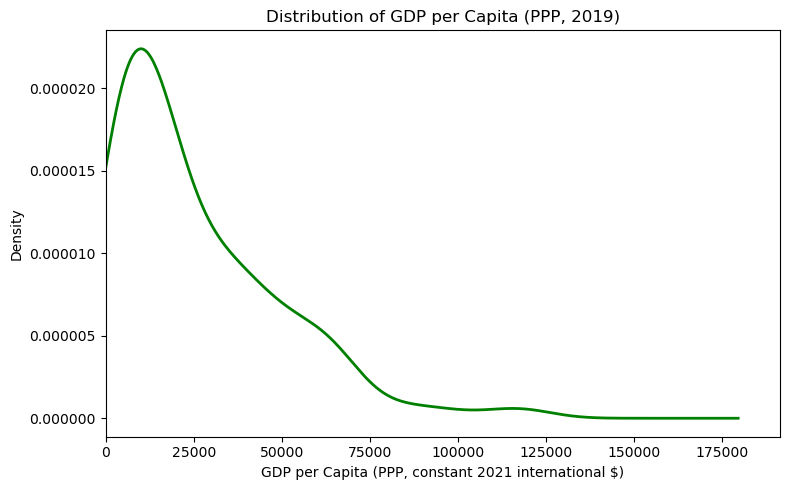

In [6]:
plt.figure(figsize=(8, 5))
ax = merged_df["GDP_per_capita_PPP"].plot.kde(color="green", linewidth=2)
plt.title("Distribution of GDP per Capita (PPP, 2019)")
plt.xlabel("GDP per Capita (PPP, constant 2021 international $)")
plt.ylabel("Density")
plt.xlim(left=0)
ax.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

**Figure 2. Kernel Density Estimate of GDP per Capita (2019).** The smooth curve highlights the right-skewed global income distribution, with most countries clustered at lower GDP levels and only a few high-income nations forming a long upper tail. This KDE visualization emphasizes economic inequality more clearly than a histogram, showing continuous variation rather than discrete bins.

## Comparing Wealth & Waste

### **Figure 3.** Scatterplot of GDP vs Waste 

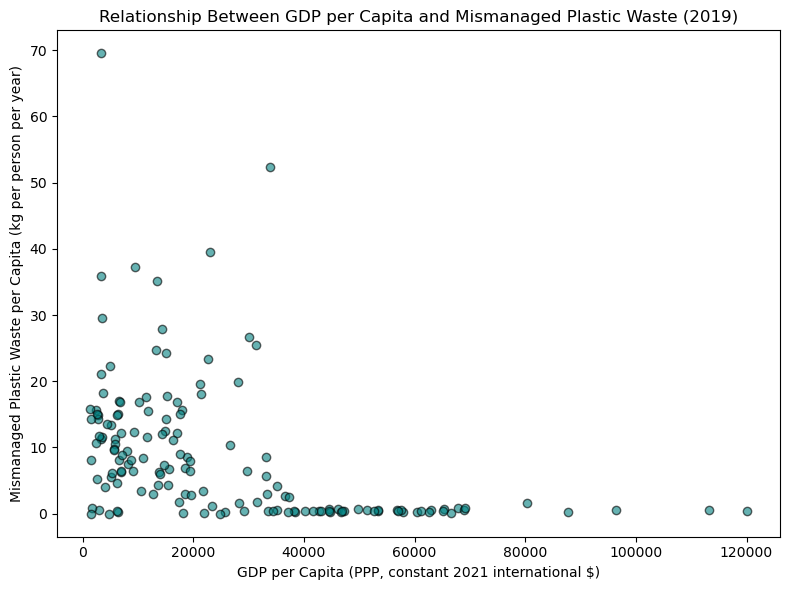

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(
    merged_df["GDP_per_capita_PPP"],
    merged_df["Plastic_waste_kg_per_capita"],
    color="teal",
    alpha=0.6,
    edgecolor="black"
)
plt.title("Relationship Between GDP per Capita and Mismanaged Plastic Waste (2019)")
plt.xlabel("GDP per Capita (PPP, constant 2021 international $)")
plt.ylabel("Mismanaged Plastic Waste per Capita (kg per person per year)")
plt.tight_layout()
plt.show()

**Figure 3. Scatterplot comparing GDP per capita and mismanaged plastic waste per capita in 2019.**  The pattern suggests that wealthier countries generally mismanage less plastic waste, though there is significant variability among middle income nations. This visualization introduces the core relationship explored in the analysis question: whether economic prosperity correlates with environmental responsibility.

### **Figure 4.** Scatterplot with Regression Line

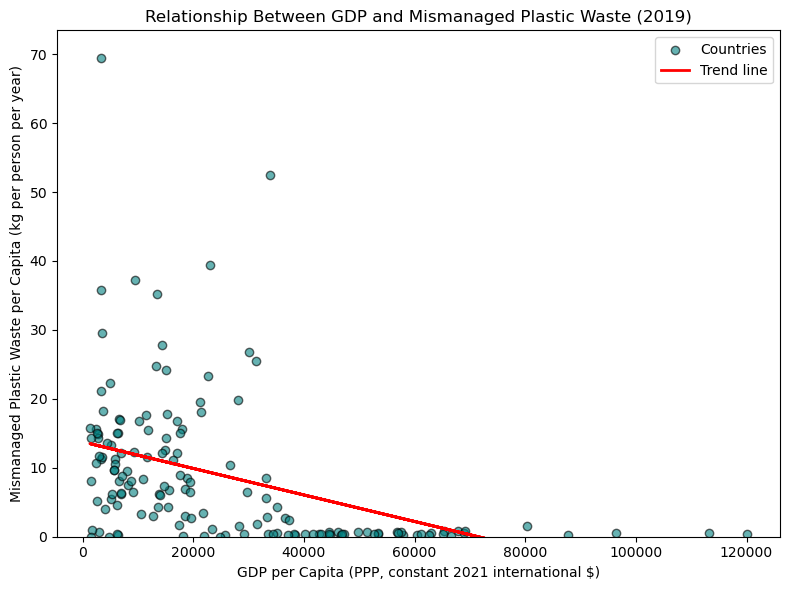

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(
    merged_df["GDP_per_capita_PPP"],
    merged_df["Plastic_waste_kg_per_capita"],
    color="teal",
    edgecolor="black",
    alpha=0.6,
    label="Countries"
)

z = np.polyfit(
    merged_df["GDP_per_capita_PPP"],
    merged_df["Plastic_waste_kg_per_capita"],
    1
)
p = np.poly1d(z)

plt.plot(
    merged_df["GDP_per_capita_PPP"],
    p(merged_df["GDP_per_capita_PPP"]),
    color="red",
    linewidth=2,
    label="Trend line"
)

plt.title("Relationship Between GDP and Mismanaged Plastic Waste (2019)")
plt.xlabel("GDP per Capita (PPP, constant 2021 international $)")
plt.ylabel("Mismanaged Plastic Waste per Capita (kg per person per year)")
plt.ylim(bottom=0)
plt.legend()
plt.tight_layout()
plt.show()

**Figure 4. Scatterplot with regression line showing the relationship between GDP per capita and mismanaged plastic waste per capita (2019).**
The y-axis begins at zero to provide a fair and accurate comparison. The negative slope of the red trend line indicates that higher income nations tend to mismanage less plastic waste per person, though exceptions exist.

## Highlighting & Explaining Outliers

### **Figure 5.** Annotated Scatterplot

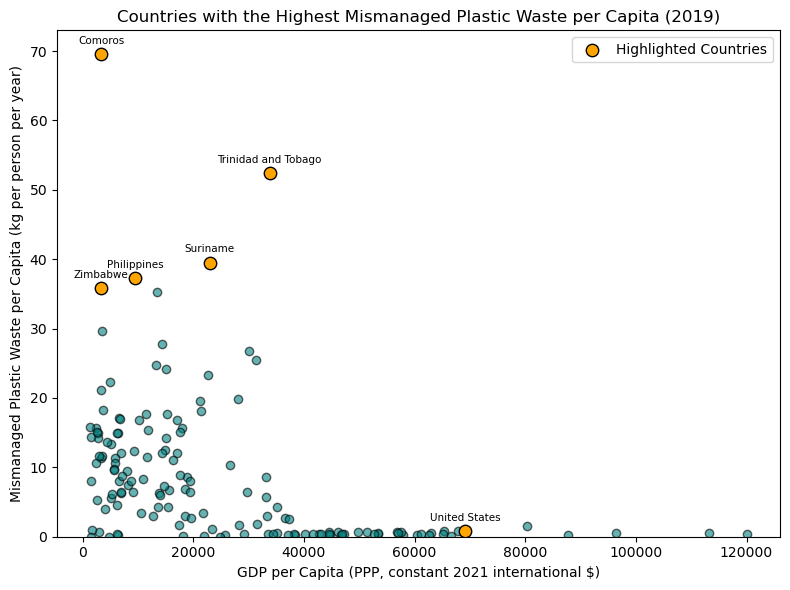

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(
    merged_df["GDP_per_capita_PPP"],
    merged_df["Plastic_waste_kg_per_capita"],
    color="teal",
    edgecolor="black",
    alpha=0.6
)

top_waste = merged_df.nlargest(5, "Plastic_waste_kg_per_capita")

us_row = merged_df[merged_df["Country"] == "United States"]
highlight = pd.concat([top_waste, us_row]).drop_duplicates(subset=["Country"])

plt.scatter(
    highlight["GDP_per_capita_PPP"],
    highlight["Plastic_waste_kg_per_capita"],
    color="orange",
    edgecolor="black",
    s=80,
    label="Highlighted Countries"
)

for _, row in highlight.iterrows():
    plt.text(
        row["GDP_per_capita_PPP"],
        row["Plastic_waste_kg_per_capita"] + 1.5,
        row["Country"],
        fontsize=7.5,
        ha="center"
    )

plt.title("Countries with the Highest Mismanaged Plastic Waste per Capita (2019)")
plt.xlabel("GDP per Capita (PPP, constant 2021 international $)")
plt.ylabel("Mismanaged Plastic Waste per Capita (kg per person per year)")
plt.ylim(bottom=0)
plt.legend()
plt.tight_layout()
plt.show()

**Figure 5. Annotated scatterplot showing the countries with the highest mismanaged plastic waste per capita in 2019, plus the United States for reference.** The highlighted nations, that are primarily middle income economies, display significantly higher levels of mismanagement per person, while the U.S. appears with lower waste relative to its income level. This reinforces that economic wealth alone does not ensure effective plastic management; infrastructure and policy are also key differentiators.

## Grouping & Comparison

### **Figure 6.** Boxplot by Income Quartile

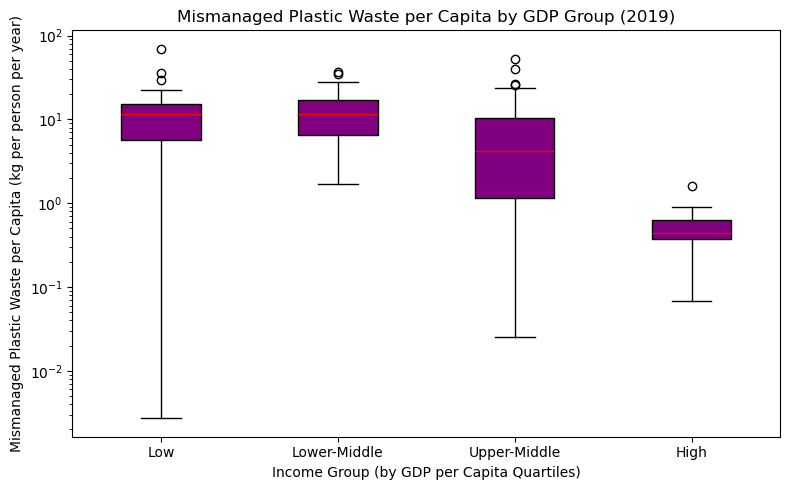

In [21]:
merged_df["Income_Group"] = pd.qcut(
    merged_df["GDP_per_capita_PPP"],
    q=4,
    labels=["Low Income", "Lower-Middle Income", "Upper-Middle Income", "High Income"]
)
plt.figure(figsize=(8, 5))
plt.boxplot(
    [merged_df.loc[merged_df["Income_Group"] == group, "Plastic_waste_kg_per_capita"]
     for group in ["Low Income", "Lower-Middle Income", "Upper-Middle Income", "High Income"]],
    tick_labels=["Low", "Lower-Middle", "Upper-Middle", "High"],
    patch_artist=True,
    boxprops=dict(facecolor="purple", color="black"),
    medianprops=dict(color="red"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black")
)

plt.title("Mismanaged Plastic Waste per Capita by GDP Group (2019)")
plt.xlabel("Income Group (by GDP per Capita Quartiles)")
plt.ylabel("Mismanaged Plastic Waste per Capita (kg per person per year)")
plt.yscale("log")
plt.tight_layout()
plt.show()

**Figure 6. Boxplot of mismanaged plastic waste per capita by GDP-based income group (2019).**
A logarithmic y-axis is used to account for the wide range of waste levels across countries. The visualization reveals that high income countries consistently exhibit the lowest levels of mismanaged plastic waste, while low and lower-middle income nations show both higher median values and greater variability. This scaling choice enhances fairness and readability by allowing all income groups to be compared on the same visual scale, without high outliers distorting the view.

## Applying Design Principles

### **Figure 7.** Revised Visualization

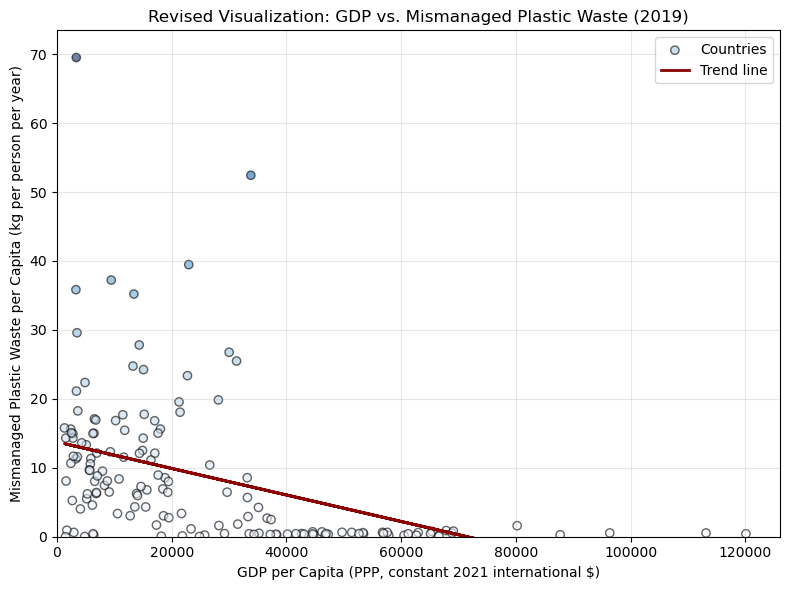

In [37]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.3)

plt.scatter(
    merged_df["GDP_per_capita_PPP"],
    merged_df["Plastic_waste_kg_per_capita"],
    c=merged_df["Plastic_waste_kg_per_capita"],
    cmap="Blues",
    edgecolor="black",
    alpha=0.6,
    label="Countries"
)

z = np.polyfit(
    merged_df["GDP_per_capita_PPP"],
    merged_df["Plastic_waste_kg_per_capita"],
    1
)
p = np.poly1d(z)
plt.plot(
    merged_df["GDP_per_capita_PPP"],
    p(merged_df["GDP_per_capita_PPP"]),
    color="darkred",
    linewidth=2,
    label="Trend line"
)

plt.title("Revised Visualization: GDP vs. Mismanaged Plastic Waste (2019)")
plt.xlabel("GDP per Capita (PPP, constant 2021 international $)")
plt.ylabel("Mismanaged Plastic Waste per Capita (kg per person per year)")
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.legend()
plt.tight_layout()
plt.show()

**Figure 7. Revised scatterplot showing the relationship between GDP per capita and mismanaged plastic waste per capita (2019).** This version applies perception based design principles: axes begin at zero to maintain fair scale, transparency reveals overlapping data points, and a sequential color gradient communicates density without clutter. The improved design enhances interpretability and visual balance, clearly showing that wealthier countries tend to mismanage less plastic waste, while preserving context for mid- and low-income variability.

## Summary Plot

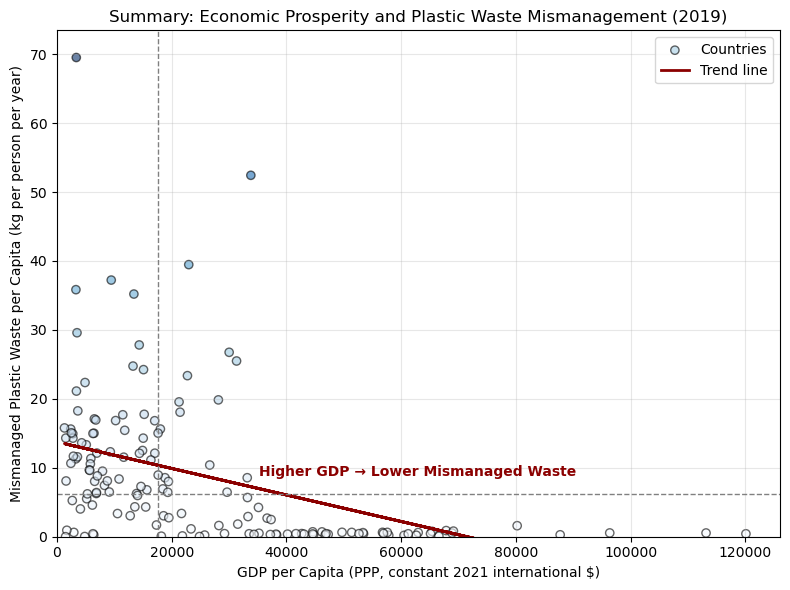

In [36]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.3)

plt.scatter(
    merged_df["GDP_per_capita_PPP"],
    merged_df["Plastic_waste_kg_per_capita"],
    c=merged_df["Plastic_waste_kg_per_capita"],
    cmap="Blues",
    edgecolor="black",
    alpha=0.6,
    label="Countries"
)

z = np.polyfit(
    merged_df["GDP_per_capita_PPP"],
    merged_df["Plastic_waste_kg_per_capita"],
    1
)
p = np.poly1d(z)
plt.plot(
    merged_df["GDP_per_capita_PPP"],
    p(merged_df["GDP_per_capita_PPP"]),
    color="darkred",
    linewidth=2,
    label="Trend line"
)

median_gdp = merged_df["GDP_per_capita_PPP"].median()
median_waste = merged_df["Plastic_waste_kg_per_capita"].median()
plt.axvline(median_gdp, color="gray", linestyle="--", linewidth=1)
plt.axhline(median_waste, color="gray", linestyle="--", linewidth=1)

plt.text(
    median_gdp * 2,
    median_waste + 2.5,
    "Higher GDP → Lower Mismanaged Waste",
    color="darkred",
    fontsize=10,
    fontweight="bold"
)

plt.title("Summary: Economic Prosperity and Plastic Waste Mismanagement (2019)")
plt.xlabel("GDP per Capita (PPP, constant 2021 international $)")
plt.ylabel("Mismanaged Plastic Waste per Capita (kg per person per year)")
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.legend()
plt.tight_layout()
plt.show()

**Figure 8. Summary visualization of the relationship between GDP per capita and mismanaged plastic waste per capita (2019).** The scatterplot, trend line, and median reference markers collectively highlight the key finding of this analysis: countries with higher GDP per capita tend to mismanage less plastic waste per person. This inverse pattern shows how economic prosperity and infrastructure investment play critical roles in reducing global plastic pollution.

## Conclusion & Reflection

Throughout this project, I explored how economic prosperity relates to environmental responsibility through analyzing global data on GDP per capita and mismanaged plastic waste per capita. The goal was to create a data story that demonstrates both analytical and thoughtful visual design. Using data from Our World in Data, I examined whether wealthier countries truly manage plastic waste more effectively than lower income nations.

One of the main challenges I faced early on was data wrangling and cleaning. Although both datasets contained clear country and year fields, aligning them required filtering for shared years (2019) and merging on consistent country codes. Once cleaned, I explored the data’s structure through distribution plots, which revealed strong skewness in both variables. Many countries clustered at low levels of GDP and waste, while a few high income nations dominated the upper ranges. This step reinforced the importance of understanding data shape before making comparisons.

In terms of visualization design, I focused on balancing clarity with fairness. My initial scatterplot made the general pattern visible, but could be improved for perceptual accuracy. By redesigning it (Figure 7), I applied principles from perception based visualization: starting both axes at zero to avoid exaggerating slopes, using a sequential color gradient for better point density, and adding subtle gridlines for contextual reference. These refinements made the relationship easier to interpret without introducing visual bias.

Another design decision involved using a logarithmic scale in the boxplot to fairly represent wide variability among income groups. Without this adjustment, the “High Income” category appeared visually insignificant compared to others. The log scale allowed for a more truthful comparison without distorting the differences. This reflects an essential principle of ethical visualization that design choices should illuminate data patterns, not obscure or exaggerate them.

The final summary plot (Figure 8) synthesized all earlier insights. By combining the scatter, regression line, and median reference markers, it clearly showed that countries with higher GDP per capita tend to mismanage less plastic waste per person. However, outliers like China and Indonesia illustrated that economic growth alone does not guarantee effective waste management; policy and infrastructure also matter.

Overall, this project deepened my understanding of how data visualization is both analytical and communicative. Every color, axis, and annotation conveys meaning. Creating these visuals reminded me that effective data storytelling requires not just technical accuracy, but also perceptual fairness and narrative clarity.